# 利用Python进行数据分析
## 开始之前
先介绍一下接下来会用到的几类库。

* Numpy（Numerical Python）
    * 提供了高效的多维数组对象ndarray，效率至少是Python原生的5倍
    * 科学计算
    * 粘合剂
    * 数值型数据的处理效率比内置结构更高效
* Pandas 熊猫包
* Matplotlib
* SciPy
    * 科学计算
    虽然MATLAB很厉害，但是NP+SP可以完爆MATLAB

## 安装问题
**Anaconda + PyCharm**
### 为何使用Anaconda
答：否则配置要你命。
Anaconda自带了IPython、Jupyter Notebook、Jupyter Qtconsole还有各类包，非常实用。

## 关于社区习惯
Python引入库的时候，有社区习惯，以代码直接解释

In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

Populating the interactive namespace from numpy and matplotlib


### 看看IPython的优势のPylab

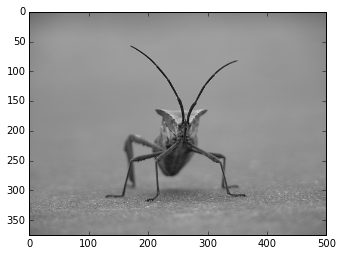

In [18]:
img = plt.imread('E:\PyAna\pydata-book-master\ch03\stinkbug.png')
imshow(img)

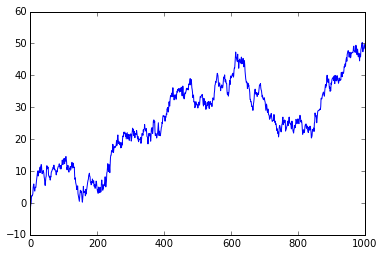

In [20]:
plot(randn(1000).cumsum())

## 以例子作为开始

注： 本节将使用到json库，json是一种数据格式

### 首先我们用Python原生尝试进行数据分析

In [2]:
path = 'E:\PyAna\pydata-book-master\ch02\usagov_bitly_data2012-03-16-1331923249.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [3]:
import json
records = [json.loads(line) for line in open(path)]

In [7]:
print records[0],"\n"
print records[0]['tz']

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11', u'c': u'US', u'nk': 1, u'tz': u'America/New_York', u'gr': u'MA', u'g': u'A6qOVH', u'h': u'wfLQtf', u'cy': u'Danvers', u'l': u'orofrog', u'al': u'en-US,en;q=0.8', u'hh': u'1.usa.gov', u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf', u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991', u't': 1331923247, u'hc': 1331822918, u'll': [42.576698, -70.954903]} 

America/New_York


In [8]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
print time_zones[:10]

[u'America/New_York', u'America/Denver', u'America/New_York', u'America/Sao_Paulo', u'America/New_York', u'America/New_York', u'Europe/Warsaw', u'', u'', u'']


In [9]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
        return counts

In [10]:
from collections import defaultdict
def get_counts2(sequence):
    counts = defaultdict(int) # rec all value to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [11]:
counts = get_counts(time_zones)
counts2 = get_counts(time_zones)
print counts,'\n',counts2,'\n',counts['America/New_York'],'\n',len(time_zones)

{u'America/New_York': 1} 
{u'America/New_York': 1} 
1 
3440


上述的操作，相对而言是一件比较麻烦的事情，不如尝试一下利用Pandas
### Pandas的处理方法

In [12]:
frame = pd.DataFrame(records)
print frame
print frame['tz'][:10]

      _heartbeat_                                                  a  \
0             NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
1             NaN                             GoogleMaps/RochesterNY   
2             NaN  Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...   
3             NaN  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...   
4             NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
5             NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
6             NaN  Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...   
7             NaN  Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...   
8             NaN  Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...   
9             NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
10            NaN  Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...   
11            NaN  Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10.4...   
12            NaN  Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2

In [13]:
tz_counts = frame['tz'].value_counts()
print tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64


比较而言，Pandas和原生Python显然是Pandas的表达方式简单而且清晰，同时代码的可读性也比原生的要更好，最关键的是，利用Pandas的开发速度要远远大于原生的速度。而且还比原生还多了数据结构的内容,尽管代价是牺牲了一些时间，不过对于程序员而言时间和CPU比起来前者重要得多。

不妨我们比较一下两种方式：

In [25]:
%timeit pd.DataFrame(time_zones)
%timeit get_counts(time_zones)
%timeit get_counts(time_zones)

1000 loops, best of 3: 262 µs per loop
The slowest run took 4.50 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 351 ns per loop
The slowest run took 5.68 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 347 ns per loop


### 数据可视化

In [14]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
print tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64


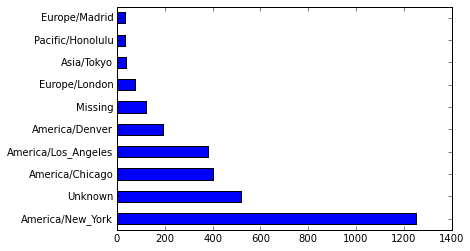

In [17]:
tz_counts[:10].plot(kind = 'barh', rot = 0)

## NumPy基础
### ndarray 多维数组对象

In [34]:
data = np.array([[0.9526,-0.246,-0.8856],[0.5639,0.2379,0.9104]])
print data

[[ 0.9526 -0.246  -0.8856]
 [ 0.5639  0.2379  0.9104]]


In [35]:
print data * 10
print data + data

[[ 9.526 -2.46  -8.856]
 [ 5.639  2.379  9.104]]
[[ 1.9052 -0.492  -1.7712]
 [ 1.1278  0.4758  1.8208]]


In [36]:
data.shape

(2L, 3L)

In [38]:
data1 = [6, 7.6, 8, 0, 1]
arr1 = np.array(data1)
print arr1

[ 6.   7.6  8.   0.   1. ]


In [39]:
data2 = [[1,2,3,4],[5,6,7,8]]
arr2 = np.array(data2)
print arr2

[[1 2 3 4]
 [5 6 7 8]]


In [40]:
print arr2.ndim
print arr2.shape

2
(2L, 4L)


In [43]:
print np.zeros(10)
print np.zeros((3,6))
print np.empty((2,3,2))
print np.ones((2,3))

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
[[[  3.23785921e-319   6.36598737e-314]
  [  0.00000000e+000   1.27319747e-313]
  [  1.27319747e-313   1.27319747e-313]]

 [[  2.96439388e-323   1.90979621e-313]
  [  0.00000000e+000   2.75859453e-313]
  [  6.91691904e-323   3.60739284e-313]]]
[[ 1.  1.  1.]
 [ 1.  1.  1.]]


In [45]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### 数组与标量的计算
** 在本例中，请注意Python中的数组、标量运算和我们熟知的矩阵运算的差别在何处。**

In [2]:
arr = np.array([[1,2,3],[4,5,6]])
print arr

[[1 2 3]
 [4 5 6]]


In [3]:
print arr * arr
print arr - arr
print 1.0 / arr
print arr ** 0.5

[[ 1  4  9]
 [16 25 36]]
[[0 0 0]
 [0 0 0]]
[[ 1.          0.5         0.33333333]
 [ 0.25        0.2         0.16666667]]
[[ 1.          1.41421356  1.73205081]
 [ 2.          2.23606798  2.44948974]]


### NumPy中的索引与切片
在Python列表中，我们已经熟知了Python中的索引切片是如何的，而NumPy中的索引与切片是和Python中大致相同的

In [4]:
arr = np.arange(10)
print arr
print arr[5]
print arr[5:8]
arr[5:8]= 12
print arr

[0 1 2 3 4 5 6 7 8 9]
5
[5 6 7]
[ 0  1  2  3  4 12 12 12  8  9]


In [6]:
arr_slice = arr[5:8]
arr_slice[1] =  12345
print arr
arr_slice[:] = 64
print arr

[    0     1     2     3     4    12 12345    12     8     9]
[ 0  1  2  3  4 64 64 64  8  9]


### 索引与切片的一般问题

* 对于索引与切片而言，最常见的问题就是，在改变索引量与切片两的过程中，原来的列表也被改变了，因此为了解决这个问题，有接下来的例子。

In [8]:
arr2 = np.arange(12)
a = arr2[5:8].copy()
a[2] = 1
print "the copy is ", a, "the origin one is ", arr2

the copy is  [5 6 1] the origin one is  [ 0  1  2  3  4  5  6  7  8  9 10 11]


 #### 对于高维度数组的切片
 对于高纬度的数组而言，我们不妨把他们看做一个个矩阵对于矩阵而言，索引已经是很容易理解的问题了。

In [9]:
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])
print arr2d
print arr2d[2]
print arr2d[0,2]

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[7 8 9]
3


In [11]:
arr3d = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
print arr3d
print arr3d[0]
old_v = arr3d[0].copy()
arr3d[0] = 42
print arr3d
arr3d[0] = old_v
print arr3d

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
[[1 2 3]
 [4 5 6]]
[[[42 42 42]
  [42 42 42]]

 [[ 7  8  9]
  [10 11 12]]]
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [12]:
print arr3d[1, 0]

[7 8 9]


#### 高维度数组下的切片索引

In [13]:
print arr

[ 0  1  2  3  4 64 64 64  8  9]


In [14]:
print arr[1:6]

[ 1  2  3  4 64]


In [15]:
print arr2d
print arr2d[:2]

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]]


In [16]:
print arr2d[:2, 1:]

[[2 3]
 [5 6]]


In [17]:
print arr2d[1,:2]
print arr2d[2,:1]

[4 5]
[7]


In [18]:
arr2d[:,:1]

array([[1],
       [4],
       [7]])

#### 布尔型索引

In [19]:
names = np.array(['bob','joe','will','bob','will','joe','joe'])
data = randn(7,4)
print names
print data

['bob' 'joe' 'will' 'bob' 'will' 'joe' 'joe']
[[ 0.63714319 -1.5625962   0.52097035  0.89613968]
 [ 1.83928802 -1.03659555  0.60187362 -0.29186614]
 [ 1.4319037  -0.75868836  0.08453968 -1.01872199]
 [ 0.81589157  0.19524836 -0.54634869  0.52401215]
 [-1.52919584 -0.1290124  -0.79031517  1.11374589]
 [ 0.33908737 -0.24075697  0.33029698  0.47808061]
 [ 0.49451584 -0.45836623  1.27194972  0.21402202]]


In [20]:
names == 'bob'

array([ True, False, False,  True, False, False, False], dtype=bool)

In [21]:
data[names == 'bob']

array([[ 0.63714319, -1.5625962 ,  0.52097035,  0.89613968],
       [ 0.81589157,  0.19524836, -0.54634869,  0.52401215]])

#### Fancy Indexing 花式索引
花式索引是NumPy中的一个术语与技术，其利用整数数组进行索引。

In [22]:
arr = np.empty((8,4))
for i in range(8):
    arr[i] = i
print arr

[[ 0.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 2.  2.  2.  2.]
 [ 3.  3.  3.  3.]
 [ 4.  4.  4.  4.]
 [ 5.  5.  5.  5.]
 [ 6.  6.  6.  6.]
 [ 7.  7.  7.  7.]]


In [23]:
arr[[4,3,0,6]]

array([[ 4.,  4.,  4.,  4.],
       [ 3.,  3.,  3.,  3.],
       [ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.]])

In [24]:
arr[[-1,-3,-5,-4]]

array([[ 7.,  7.,  7.,  7.],
       [ 5.,  5.,  5.,  5.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.]])

### 数组转置轴对换

In [26]:
arr = np.arange(15).reshape(3,5)
print arr
print arr.T

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


In [28]:
arr2 = np.random.randn(6,3)
print np.dot(arr2.T, arr2)

[[ 12.90652421  -2.03603298  -1.82283288]
 [ -2.03603298   8.49707793   0.49877663]
 [ -1.82283288   0.49877663   6.42392596]]


#### 轴的简介
![](http://ww4.sinaimg.cn/mw690/6a7f6fa8jw1ey3ou8z8uxj20dt09pglr.jpg)

因此，对于高维数组而言，转置就需要依照由轴组成的元组才能够进行转置。

In [29]:
arr = np.arange(16).reshape((2,2,4))
print arr
arr.transpose(1,0,2)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

### NumPy与线性代数
线性代数在数据处理中有着极其重要的作用，对于现代代数化的数学也有着极为重要的作用，纵观所有语言中，对于线性代数准备的最好的是MATLAB（取名便是Martix Lab），而对于Python而言，Python对于线性代数的支持就比较一般，而Numpy中，简单的二元运算时直接的元素计算，而真正计算矩阵的，则利用了dot函数。

In [31]:
x = np.array([[1.,2.,3.],[4.,5.,6.]])
y = np.array([[6.,23.],[-1.,7.],[8.,9.]])
print x,'\n', y
print x.dot(y)
print np.dot(x,y)

[[ 1.  2.  3.]
 [ 4.  5.  6.]] 
[[  6.  23.]
 [ -1.   7.]
 [  8.   9.]]
[[  28.   64.]
 [  67.  181.]]
[[  28.   64.]
 [  67.  181.]]


关于更广泛的线性代数计算，则应当在numpy的linalg中寻找（Linear Algebra）

In [37]:
from numpy.linalg import inv, qr
x = randn(5,5)
mat = x.T.dot(x)
print mat, '\n', inv(mat), '\n', mat.dot(inv(mat))
q, r = qr(mat)
print q, '\n', r

[[ 6.06630723  2.18890168  4.32671453 -2.52568716 -0.57884326]
 [ 2.18890168  4.8818073   2.33438949 -2.381599   -1.32165829]
 [ 4.32671453  2.33438949  5.45667678 -2.20888323 -3.71415902]
 [-2.52568716 -2.381599   -2.20888323  2.05125823  1.38305598]
 [-0.57884326 -1.32165829 -3.71415902  1.38305598  5.44904596]] 
[[ 13.03187754   4.45363347 -14.00303871  13.16441011 -10.42146332]
 [  4.45363347   1.99942451  -4.76378811   5.08964565  -3.58085064]
 [-14.00303871  -4.76378811  15.55207427 -13.74283347  11.44573211]
 [ 13.16441011   5.08964565 -13.74283347  14.89718883 -10.51556786]
 [-10.42146332  -3.58085064  11.44573211 -10.51556786   8.67855287]] 
[[  1.00000000e+00   1.77635684e-15   4.44089210e-15   6.21724894e-15
   -4.44089210e-15]
 [  0.00000000e+00   1.00000000e+00   1.77635684e-15  -3.55271368e-15
   -5.32907052e-15]
 [  2.13162821e-14   8.88178420e-15   1.00000000e+00   7.10542736e-15
   -1.42108547e-14]
 [  1.77635684e-15  -8.88178420e-16  -7.10542736e-15   1.00000000e+00
 

### 利用NumPy计算随机数
在NumPy中，numpy.random模块让Python随机数的内容更充实，并且还能够高效生成一些符合于特定分布的随机数组

In [38]:
samples = np.random.normal(size = (4,4))
print samples

[[-1.28297273 -0.29758815  0.77960883 -0.99248221]
 [ 1.06076369  0.6924267   0.48007084 -0.72656321]
 [-0.52318494 -1.88514867  0.57895667 -0.53238696]
 [-1.49467259  2.61386033  0.31444592 -1.08712647]]


In [39]:
from random import normalvariate


In [40]:
N = 1000000
%timeit samples = [normalvariate(0,1) for _ in xrange(N)]
%timeit np.random.normal(size = N)

1 loops, best of 3: 1.06 s per loop
10 loops, best of 3: 48.5 ms per loop


### 随机漫步的表示
随机森林是现代概率论中的重要组成部分，因此我们利用NumPy的随机数模块进行随机漫步的一个表示，事实上，我们在最初已经做过一个简单的例子。

In [48]:
import random
position = 0
walk = [position]
steps = 1000
for i in xrange(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

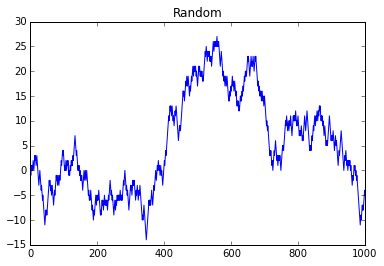

In [49]:
plot(walk)
plt.title('Random')

In [50]:
nsteps = 1000
draws = np.random.randint(0,2,size = nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum